In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread('./dataset/Cole Palmer/Cole Palmer.jpg')
img.shape

(450, 800, 3)

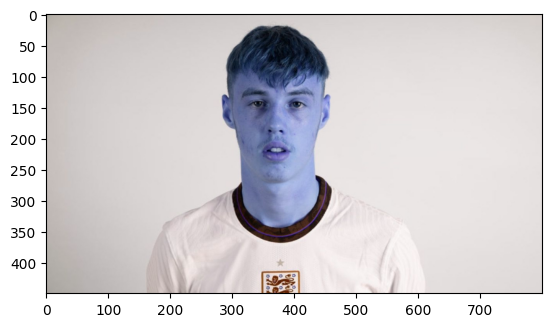

In [3]:
plt.imshow(img)
plt.show()

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(450, 800)

I changed it to two dimensional photo

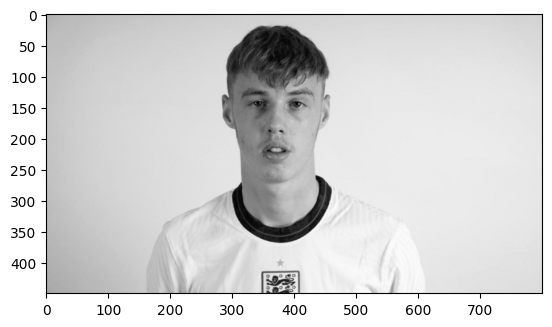

In [5]:
plt.imshow(gray, cmap="gray")
plt.show()

In [6]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray)

In [7]:
(x, y, w, h) = faces[0]

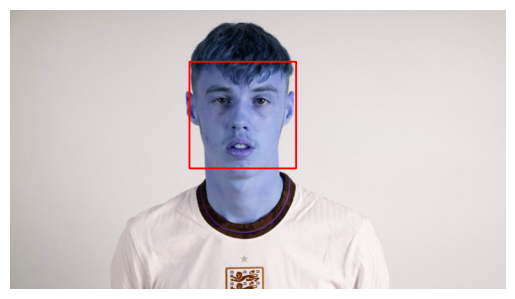

In [8]:
face_img = cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
plt.imshow(face_img)
plt.axis('off')
plt.show()

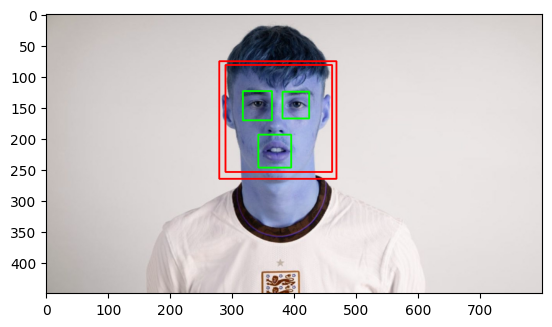

In [9]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces:
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

plt.imshow(img)
plt.show()

In [22]:
def detect_faces_that_have_two_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

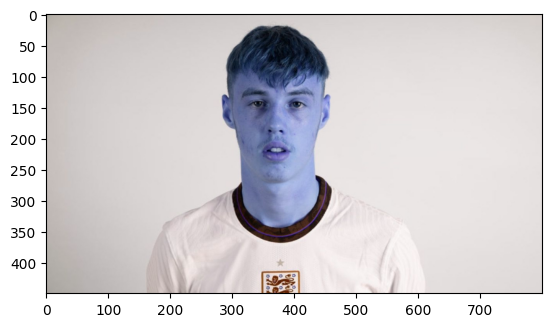

In [11]:
original_img = cv2.imread('./dataset/Cole Palmer/Cole Palmer.jpg')
plt.imshow(original_img)

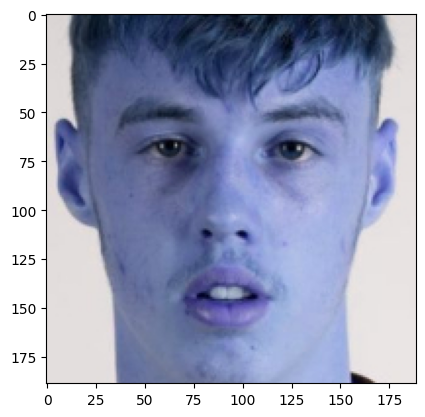

In [12]:
cropped_img = detect_faces_that_have_two_eyes('./dataset/Cole Palmer/Cole Palmer.jpg')
plt.imshow(cropped_img)  

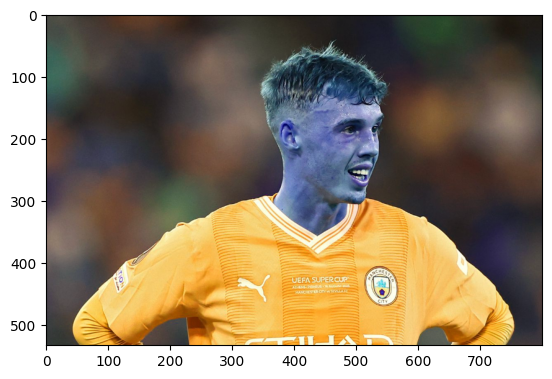

In [13]:
img_no_two_eyes = cv2.imread('./dataset/Cole Palmer/Cole.jpg')
plt.imshow(img_no_two_eyes)


In [27]:
import os

img_dirs = []
for entry in os.scandir('./dataset'):
    if entry.is_dir():
        img_dirs.append(entry.path)

img_dirs        

['./dataset\\Cole Palmer',
 './dataset\\Cristiano Ronaldo',
 './dataset\\Kevin De Bruyne',
 './dataset\\Lamine Yamal',
 './dataset\\Lionel Messi',
 './dataset\\Mohamed Salah']

In [29]:
cropped_img_dirs = []
player_files_names ={}

for img_dir in img_dirs:
    count = 1
    player_name = (img_dir.split('/')[-1]).split('\\')[-1]
    print(player_name)
    player_files_names[player_name] = []

    for entry in os.scandir(img_dir):
        roi_color = detect_faces_that_have_two_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = "./cropped_dataset/" + player_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_img_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = player_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            player_files_names[player_name].append(cropped_file_path)
            count += 1 

Cole Palmer
Cristiano Ronaldo
Kevin De Bruyne
Generating cropped images in folder:  ./cropped_dataset/Kevin De Bruyne
Lamine Yamal
Generating cropped images in folder:  ./cropped_dataset/Lamine Yamal
Lionel Messi
Generating cropped images in folder:  ./cropped_dataset/Lionel Messi
Mohamed Salah
Generating cropped images in folder:  ./cropped_dataset/Mohamed Salah
